In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the CSV file
data = pd.read_csv("/Users/gdarkwah/Library/CloudStorage/OneDrive-UW/01-Research/01-THORR/data/insitu/conditions/processed/DART_GCGW.csv")
data["date"] = pd.to_datetime(data["date"])

<Axes: title={'center': 'Outflow'}, xlabel='date'>

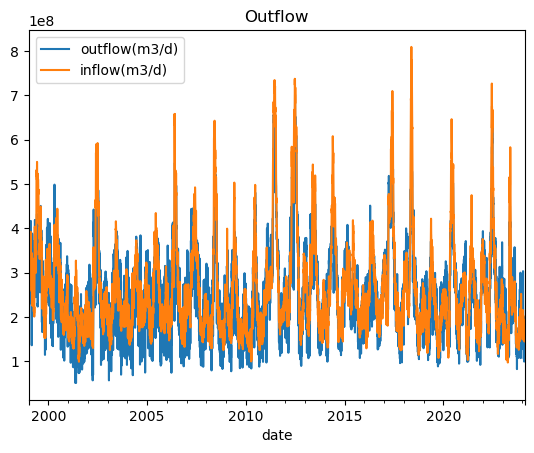

In [15]:
fig, ax = plt.subplots()

data.plot(x="date", y="outflow(m3/d)", title="Outflow", ax=ax)
data.plot(x="date", y="inflow(m3/d)", ax=ax)

In [16]:
data['doy'] = data['date'].dt.dayofyear
data['month'] = data['date'].dt.month
data.head()


,date,outflow(m3/d),inflow(m3/d),spill(m3/d),avg_temp(C),wse_tail(m),doy,month
0,1999-01-01,1.883860e+08,2.429446e+08,0.0,7.28,292.534848,1,1
1,1999-01-02,2.933929e+08,2.466144e+08,0.0,7.10,293.757096,2,1
2,1999-01-03,2.851724e+08,2.426999e+08,0.0,7.07,293.632128,3,1
3,1999-01-04,3.770901e+08,2.634958e+08,0.0,7.03,294.717216,4,1
4,1999-01-05,3.441103e+08,2.541988e+08,0.0,6.81,294.330120,5,1


In [17]:
data_30y = data[(data['date'] >= '1992-10-01') & (data['date'] <= '2023-09-30')]

In [18]:
avg_30y = data_30y.groupby('doy').mean().reset_index()
avg_30y_month = data_30y.groupby('month').mean().reset_index()

/var/folders/0q/tm370x9d1qdg6nt3w7pcqh_w0000gq/T/ipykernel_5282/123110298.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_30y = data_30y.groupby('doy').mean().reset_index()
/var/folders/0q/tm370x9d1qdg6nt3w7pcqh_w0000gq/T/ipykernel_5282/123110298.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_30y_month = data_30y.groupby('month').mean().reset_index()


In [19]:
# avg_30y[avg_30y['doy'] == 366] = np.nan
# avg_30y
avg_30y_month.to_csv('/Users/gdarkwah/Library/CloudStorage/OneDrive-UW/99-TA_Grader/CEWA 579/gc_downstream_monthly.csv', index=False)

In [20]:
# avg_30y[avg_30y['doy'] == 366] = np.nan
# avg_30y
avg_30y_month

,month,outflow(m3/d),inflow(m3/d),spill(m3/d),avg_temp(C),wse_tail(m),doy
0,1,2.597626e+08,2.394401e+08,2.317140e+04,4.320092,293.120213,16.000000
1,2,2.443868e+08,2.163864e+08,3.558965e+04,3.130489,292.968212,45.623229
2,3,2.257226e+08,2.074707e+08,1.135178e+06,3.568638,292.808783,75.240000
3,4,2.670803e+08,2.508437e+08,3.029280e+06,5.755257,293.263426,105.740000
4,5,3.291683e+08,3.963951e+08,8.316039e+06,9.426267,293.949313,136.240000
5,6,3.603645e+08,4.371679e+08,1.644178e+07,12.689427,294.251632,166.740000
6,7,3.101740e+08,3.316918e+08,5.927459e+06,15.595169,293.670800,197.240000
7,8,2.567017e+08,2.487120e+08,3.332388e+05,18.110660,293.044635,228.240000
8,9,1.635072e+08,1.950368e+08,2.430913e+05,18.585867,292.033602,258.740000
9,10,1.623980e+08,1.766029e+08,1.479781e+03,16.168844,292.043243,289.250000


In [7]:
# create dataframe with daterange for a water year
water_year = pd.date_range(start='10/1/2021', end='9/30/2022') # a dummy water year for plotting
water_year = pd.DataFrame(water_year, columns=['date'])
water_year['doy'] = water_year['date'].dt.dayofyear

In [9]:
# water_year = water_year.merge(avg_30y[['GCL_FB', 'GCL_FB(m)', 'doy']], on='doy', how='left')
water_year = water_year.merge(avg_30y[['outflow(m3/d)', 'inflow(m3/d)', 'doy']], on='doy', how='left')

/var/folders/0q/tm370x9d1qdg6nt3w7pcqh_w0000gq/T/ipykernel_33371/951602262.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']);


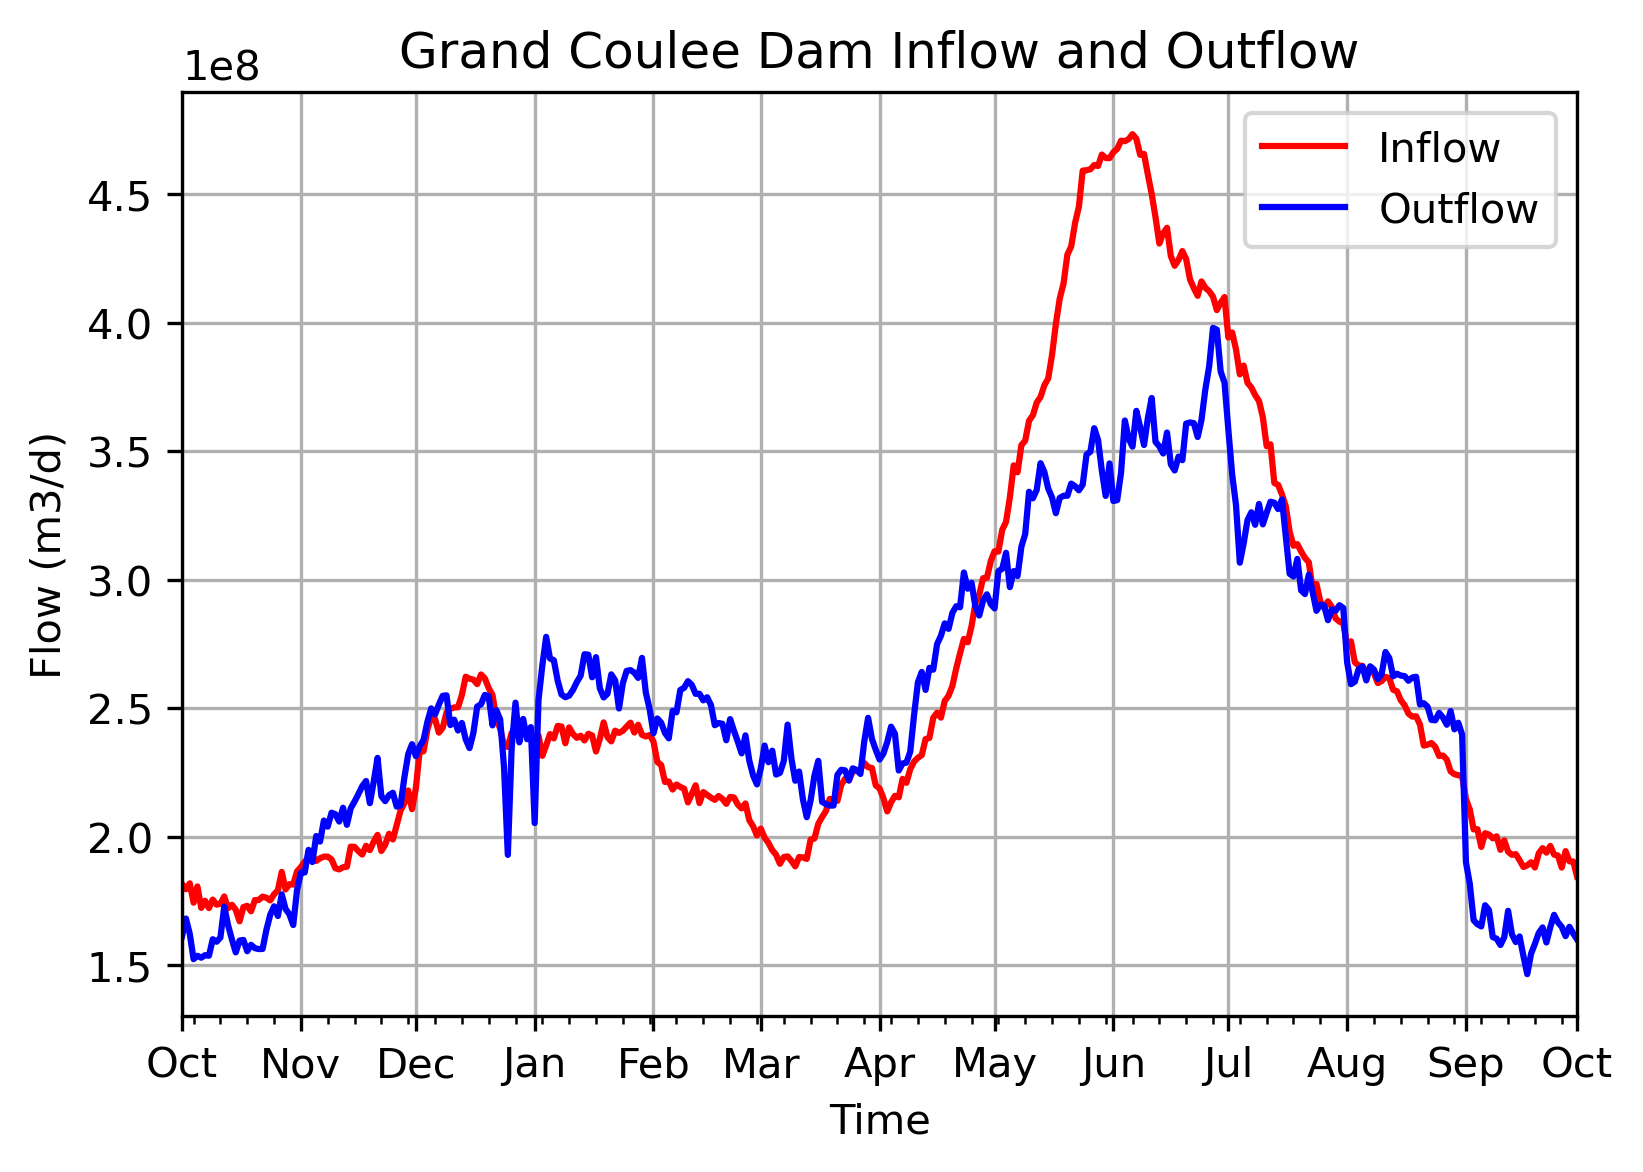

In [20]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
water_year.plot(x='date', y='inflow(m3/d)', color='red', label='Inflow', ax=ax)
water_year.plot(x='date', y='outflow(m3/d)', color='blue', label='Outflow', ax=ax)
ax.grid(True)
# remove the year from the x-axis
ax.set_xticklabels(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']);
ax.set_title('Grand Coulee Dam Inflow and Outflow')
ax.set_ylabel('Flow (m3/d)')
ax.set_xlabel('Time')

fig.savefig('grand_coulee_reservoir_elev.png', dpi=300)